Data 602 HW 9

Name: Ajit


Question:
Natural Language Processing
Use the train.tsv file at
https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
- Load the data, show the first five rows, check the data, and provide information on
the data.
- Show the distribution of review documents.
- Generate the document term matrix by using scikitlearn’s CountVectorizer. From
nltk.tokenizer import RegexpTokenizer. ‘Sentiment’ is the data. Train, test and split.
- Import the MultinomialNB module and create a MNB classifier object using the
MultinomialNB() function. Import scikit.learn metrics to compute the accuracy and fit
the model before computing the accuracy. What is the outcome?
- Use TfidfVectorizer-transformed data and split it into training and test datasets.
- Build the text classification model using TF-IDF. First, import the MultinomialNB
module and create the MNB classifier object using the MultinomialNB function. Fit the
model on the training set and perform the prediction. Is the accuracy better?

In [1]:
#importing the required libraries

import pandas as pd
import seaborn as sns

In [2]:
#loading the dataset and checking the first 5 rows

df=pd.read_csv("https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20602/data_files_DATA602/train.tsv",sep="\t")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
#Checking the information about the data and checking the shape of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [4]:
df.shape

(156060, 4)

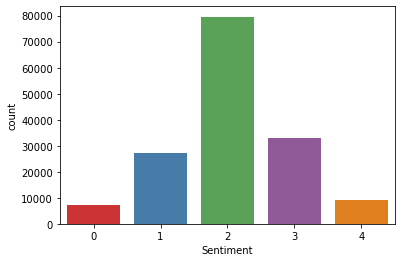

In [5]:
#Distribution of the Sentiments of the train dataset

ax=sns.countplot(x="Sentiment",data=df,palette="Set1")

In [6]:
#importing count-vectorizer from sklearn

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [7]:
#Using count vectorizer and tokenizer to split the sentences into words and getting their count

tokens = RegexpTokenizer(r'[a-zA-Z0-9]+')
count_v = CountVectorizer(tokenizer = tokens.tokenize)
text_counts= count_v.fit_transform(df['Phrase'])

In [8]:
print(count_v.vocabulary_)

{'a': 150, 'series': 11865, 'of': 9251, 'escapades': 4591, 'demonstrating': 3503, 'the': 13534, 'adage': 298, 'that': 13532, 'what': 14903, 'is': 7235, 'good': 5837, 'for': 5338, 'goose': 5853, 'also': 539, 'gander': 5611, 'some': 12452, 'which': 14920, 'occasionally': 9228, 'amuses': 612, 'but': 1890, 'none': 9108, 'amounts': 603, 'to': 13710, 'much': 8829, 'story': 12885, 'this': 13585, 'quiet': 10611, 'introspective': 7161, 'and': 635, 'entertaining': 4514, 'independent': 6858, 'worth': 15128, 'seeking': 11778, 'even': 4656, 'fans': 4957, 'ismail': 7240, 'merchant': 8471, 's': 11469, 'work': 15100, 'i': 6632, 'suspect': 13218, 'would': 15132, 'have': 6227, 'hard': 6173, 'time': 13673, 'sitting': 12187, 'through': 13627, 'one': 9296, 'positively': 10148, 'thrilling': 13620, 'combination': 2585, 'ethnography': 4635, 'all': 516, 'intrigue': 7151, 'betrayal': 1359, 'deceit': 3366, 'murder': 8853, 'shakespearean': 11937, 'tragedy': 13828, 'or': 9350, 'juicy': 7419, 'soap': 12400, 'opera'

In [9]:
cv_vector_2=count_v.transform(df["Phrase"])

In [10]:
#Creating a vector

print(cv_vector_2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
#These are the feature names of the counts presented in the above vector

count_v.get_feature_names()

['000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '10th',
 '11',
 '110',
 '112',
 '12',
 '120',
 '127',
 '129',
 '12th',
 '13',
 '13th',
 '14',
 '140',
 '146',
 '15',
 '15th',
 '16',
 '163',
 '168',
 '170',
 '1790',
 '18',
 '1899',
 '19',
 '1915',
 '1920',
 '1930s',
 '1933',
 '1937',
 '1938',
 '1940s',
 '1950',
 '1950s',
 '1952',
 '1953',
 '1957',
 '1958',
 '1959',
 '1960',
 '1960s',
 '1962',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1975',
 '1979',
 '1980',
 '1980s',
 '1984',
 '1986',
 '1987',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1997',
 '1998',
 '1999',
 '19th',
 '2',
 '20',
 '2000',
 '2001',
 '2002',
 '20th',
 '21',
 '21st',
 '22',
 '24',
 '2455',
 '25',
 '26',
 '270',
 '295',
 '3',
 '30',
 '300',
 '3000',
 '30s',
 '37',
 '3d',
 '4',
 '40',
 '40s',
 '42',
 '451',
 '48',
 '4ever',
 '4th',
 '4w',
 '5',
 '50',
 '500',
 '50s',
 '51',
 '51st',
 '52',
 '53',
 '5ths',
 '6',
 '60',
 '60s',
 '65',
 '65th',
 '66',
 '7',
 '70',
 '70s',
 '71

In [12]:
#Splitting the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['Sentiment'], test_size = 0.3, random_state = 42)

In [14]:
#Importing MultinomialNB module

from sklearn.naive_bayes import MultinomialNB

In [15]:
clf=MultinomialNB()
clf.fit(X_train,Y_train)

MultinomialNB()

In [16]:
y_pred=clf.predict(X_test)
y_pred

array([2, 4, 2, ..., 2, 3, 2])

In [17]:
#importing the metrics module to calculate the accuracy of the model

from sklearn import metrics

In [18]:
#Accuracy of the model

metrics.accuracy_score(Y_test,y_pred)

0.6112392669486095

The accuracy of the TF-IDF model is 61.123%. The model has low accuracy, we will build a text classification model using TF-IDF and check if the accuracy imporves.

In [19]:
#importing the TfidVectorizer module

from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tf=TfidfVectorizer()

In [21]:
text_tf=tf.fit_transform(df["Phrase"])

In [22]:
#Using the TfidfVectorizer-transformed data and splitting it into train and test data

X_train, X_test, Y_train, Y_test= train_test_split(text_tf,df["Sentiment"],test_size=0.3,random_state=42)

In [23]:
clf_1=MultinomialNB()
clf_1.fit(X_train,Y_train)

MultinomialNB()

In [24]:
y_pred_1=clf_1.predict(X_test)

In [25]:
y_pred_1

array([2, 3, 2, ..., 2, 2, 2])

In [26]:
#Printing the accuracy score of the model

metrics.accuracy_score(Y_test,y_pred_1)

0.5815284719552309

The accuracy of the TF-IDF model is 58.1528%. No, the accuracy is not better.